In [40]:
# -*- coding: utf-8 -*-
"""

"""

# 导入相关库
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

# 导入数据
#data = pd.read_csv("南方先行一周.csv")
#data = pd.read_csv("南方.csv")
#data = pd.read_csv("南方先行两周.csv")
#data = pd.read_csv("南方先行同步.csv")
#data = pd.read_csv("南方同步监测.csv")
#data = pd.read_csv("南方同步预测.csv")
#data = pd.read_csv("南方先行.csv")

#data = pd.read_csv("北方先行一周.csv")
#data = pd.read_csv("北方.csv")
#data = pd.read_csv("北方先行两周.csv")
#data = pd.read_csv("北方先行同步.csv")
#data = pd.read_csv("北方同步监测.csv")
#data = pd.read_csv("北方同步预测.csv")
data = pd.read_csv("北方先行.csv")

#使用均值对空缺值进行填充
for i in range(data.shape[1]): #shape[1]代表列数
    data.iloc[:,i] = data.iloc[:,i].fillna(data.iloc[:,i].mean())

chushu = data.shape[1]-1 #输出列的位置
data_x = data .iloc[:,0:chushu]#选择训练输入数据
data_y = data .iloc[:,chushu]#选择训练输出数据


from sklearn.model_selection import train_test_split#通过train_test_split划分数据集
train_x, test_x, train_y, test_y = train_test_split(data_x,data_y,test_size=0.2,random_state=11)#测试样本比例为0.2

#对输入特征进行归一化
from sklearn import preprocessing
mm_1 = preprocessing.MinMaxScaler(feature_range=(0,1))
train_x = mm_1.fit_transform(train_x)

from sklearn import preprocessing
mm_3 = preprocessing.MinMaxScaler(feature_range=(0,1))
test_x = mm_3.fit_transform(test_x)

print("训练输入数据维度：",train_x.shape)
print("训练输出数据维度：",train_y.shape)
print("测试输入数据维度：",test_x.shape)
print("测试输出数据维度：",test_y.shape)


训练输入数据维度： (387, 8)
训练输出数据维度： (387,)
测试输入数据维度： (97, 8)
测试输出数据维度： (97,)


In [41]:
import warnings
warnings.filterwarnings("ignore")

def mape(y_true,y_pre):
    true=y_true[y_true!=0]
    pre=y_pre[y_true!=0]
    mape_ = np.mean(np.abs((pre-true)/true))
    return mape_

best_score = 1000
from sklearn.svm import SVR
#利用循环找最佳参数
for i in [2,3,4,5]:
    print(i)
    for j in [0.05,0.1,0.15,0.2,0.25,0.3]:
        for k in [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]:
            degree = i
            epsilon=j
            C = k
            model=SVR(kernel ='rbf',degree = degree,gamma ='auto',epsilon=epsilon,C = C)
            model.fit(train_x,train_y) 
            pred_y = model.predict(test_x)
            pred_y= np.array(pred_y).reshape(-1,1)
            from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
            r2_score = r2_score(test_y,pred_y)
            mse=mean_squared_error(test_y,pred_y)
            rmse = np.sqrt(mean_squared_error(test_y,pred_y))
            print("测试的mse",mse)
            if mse < best_score:
                best_score = mse
                best_parameters = {'degree':degree,
                                   'epsilon':epsilon,
                                   'C':C}
print('best score:{:.2f}'.format(best_score)) 
print('best parameters:{}'.format(best_parameters))
        

2
3
4
5
best score:0.35
best parameters:{'degree': 2, 'epsilon': 0.05, 'C': 0.2}


0
0.2916271726260884
0.2916271726260884


测试的r2 0.521576410868773
测试的mse 0.3542016187315184
测试的mae 0.4705875999144882
测试的rmse: 0.595
测试的mape 0.16480440170673427
训练的r2 0.6805325995382108
训练的mse 0.2544793339561738
训练的mae 0.3412669317503396
训练的rmse: 0.504
训练的mape 0.10809774679289973


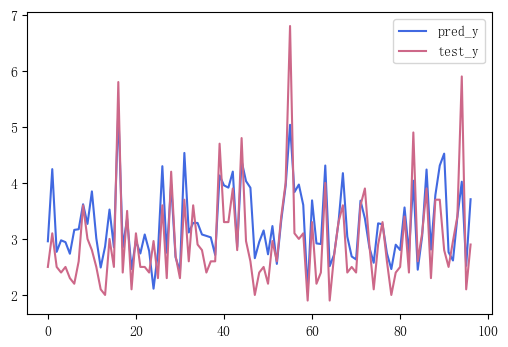

In [42]:
##SVM神经网络预测
model=SVR(kernel ='rbf',degree = 2,gamma ='auto',epsilon = 0.05, C = 0.2)
model.fit(train_x,train_y) 
pred_y1 = model.predict(train_x)
pred_y = model.predict(test_x)
pred_y= np.array(pred_y).reshape(-1,1)
#pred_y = mm_4.inverse_transform(pred_y)#利用上面的归一化结构反归一化

##转化下数据格式(数量, 1)，避免画图出错
pred_y= np.array(pred_y).reshape(-1,1)
test_y= np.array(test_y).reshape(-1,1)

##误差统计指标##
def mape(y_true,y_pre):
    true=y_true[y_true!=0]
    pre=y_pre[y_true!=0]
    mape_ = np.mean(np.abs((pre-true)/true))
    return mape_

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
print("测试的r2",r2_score(test_y,pred_y))
print("测试的mse",mean_squared_error(test_y,pred_y))
rmse = np.sqrt(mean_squared_error(test_y,pred_y))
print("测试的mae",mean_absolute_error(test_y,pred_y))
print('测试的rmse: %.3f'%rmse)
print("测试的mape",mape(test_y,pred_y))


print("训练的r2",r2_score(train_y,pred_y1))
print("训练的mse",mean_squared_error(train_y,pred_y1))
rmse = np.sqrt(mean_squared_error(train_y,pred_y1))
print("训练的mae",mean_absolute_error(train_y,pred_y1))
print('训练的rmse: %.3f'%rmse)
print("训练的mape",mape(train_y,pred_y1))

##绘图展示结果##
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['font.sans-serif'] = 'SimSun' 
plt.figure(dpi=100)#图片像素
plt.plot(pred_y, color='#4169E1', label='pred_y')
plt.plot(test_y, color='#CD6889', label='test_y')
plt.legend()
plt.show()